## Imports

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Layer

In [ ]:
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        super(IdentityBlock, self).__init__(name='')

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()

        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()

        self.act = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()
    
    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.act(x)

        x = self.conv2(x)
        x = self.bn2(x)

        x = self.add([x, input_tensor])
        x = self.act(x)
        return x

In [ ]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.conv = tf.keras.layers.Conv2D(64, 7, padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.act = tf.keras.layers.Activation('relu')
        self.max_pool = tf.keras.layers.MaxPool2D((3, 3))

        # Use the Identity blocks that you just defined
        self.id1a = IdentityBlock(64, 3)
        self.id1b = IdentityBlock(64, 3)

        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.act(x)
        x = self.max_pool(x)

        # insert the identity blocks in the middle of the network
        x = self.id1a(x)
        x = self.id1b(x)

        x = self.global_pool(x)
        return self.classifier(x)

In [ ]:
# utility function to normalize the images and return (image, label) pairs.
def preprocess(features):
    return tf.cast(features['image'], tf.float32) / 255., features['label']

# create a ResNet instance with 10 output units for MNIST
resnet = ResNet(10)
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# load and preprocess the dataset
dataset = tfds.load('mnist', split=tfds.Split.TRAIN)
dataset = dataset.map(preprocess).batch(32)

# train the model
history= resnet.fit(dataset, epochs=1)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.1292 - accuracy: 0.9649


In [ ]:
dataset = tfds.load('cats_vs_dogs', split=tfds.Split.TRAIN, data_dir='data/')

# Initialize VGG with the number of classes 
resnet = ResNet(num_classes=2)

# Compile with losses and metrics
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define preprocessing function
def preprocess(features):
    # Resize and normalize
    image = tf.image.resize(features['image'], (224, 224))
    return tf.cast(image, tf.float32) / 255., features['label']

# Apply transformations to dataset
dataset = dataset.map(preprocess).batch(32)

# Train the custom VGG model
history=resnet.fit(dataset, epochs=10)

Shuffling and writing examples to data/cats_vs_dogs/4.0.0.incompleteL6COZR/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to data/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
Epoch 1/10
727/727 [==============================] - 93s 126ms/step - loss: 0.6472 - accuracy: 0.6175
Epoch 2/10
727/727 [==============================] - 93s 127ms/step - loss: 0.6173 - accuracy: 0.6525
Epoch 3/10
727/727 [==============================] - 92s 127ms/step - loss: 0.5803 - accuracy: 0.6953
Epoch 4/10
727/727 [==============================] - 94s 129ms/step - loss: 0.5396 - accuracy: 0.7300
Epoch 5/10
727/727 [==============================] - 94s 130ms/step - loss: 0.5073 - accuracy: 0.7572
Epoch 6/10
727/727 [==============================] - 94s 130ms/step - loss: 0.4800 - accuracy: 0.7728
Epoch 7/10
727/727 [==============================] - 93s 127ms/step - loss: 0.4516 - accuracy: 0.7928
Epoch 8/10
727/727 [==============================] - 92s 127ms/step - loss: 0.4236 - accuracy: 0.8089
Epoch 9/10
727/727 [==============================] - 94s 129ms/

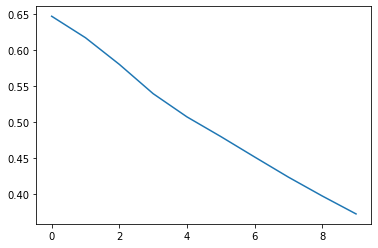

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['accuracy'], label='accuracy')